# Atividade 4: Trabalhando com Dados do ENADE 2017

### 1) Importação de dados e bibliotecas

In [1]:
import pandas
import matplotlib.pyplot as plt

enade2017=pandas.read_csv("MICRODADOS_ENADE_2017.txt", sep=';',dtype={"DS_VT_ESC_OFG": str, 
                                                                               'DS_VT_ESC_OCE':str,
                                                                              'DS_VT_ACE_OCE':str,
                                                                              'NT_GER':str,
                                                                              'NT_FG':str,
                                                                              'NT_OBJ_FG':str,
                                                                              'NT_DIS_FG':str,
                                                                              'NT_CE':str,
                                                                              'NT_OBJ_CE':str,
                                                                              'NT_DIS_CE':str})


enade2017.shape

(537436, 150)

### 2) Escolhendo colunas de interesse da tabela.

In [2]:

'''
NT_GER
Nota bruta da prova - Média ponderada da formação geral (25%) e componente específico (75%). (valor de 0 a 100)
min = 0
max = 98,10

NT_FG
Nota bruta na formação geral - Média ponderada da parte objetiva (60%) e discursiva (40%) na formação geral. (valor de 0 a 100)
min = 0
max = 99,4

NT_CE
Nota bruta no componente específico - Média ponderada da parte objetiva (85%) e discursiva (15%) no componente específico. (valor de 0 a 100)
min = 0
max = 100

CO_GRUPO
Código da área de enquadramento do curso no Enade
Entre 21 e 6409

QE_I06: Onde e com quem você mora atualmente?
A = Em casa ou apartamento, sozinho.
B = Em casa ou apartamento, com pais e/ou parentes.
C = Em casa ou apartamento, com cônjuge e/ou filhos.
D = Em casa ou apartamento, com outras pessoas (incluindo república).
E = Em alojamento universitário da própria instituição.
F = Em outros tipos de habitação individual ou coletiva (hotel, hospedaria, pensão ou outro)

QE_I13: Ao longo da sua trajetória acadêmica, você recebeu algum tipo de bolsa acadêmica?
No caso de haver mais de uma opção, marcar apenas a bolsa de maior duração.
A = Nenhum.
B = Bolsa de iniciação científica.
C = Bolsa de extensão.
D = Bolsa de monitoria/tutoria.
E = Bolsa PET.
F = Outro tipo de bolsa acadêmica.

'''

tabela = pandas.DataFrame(enade2017, columns=['NT_GER', 'NT_FG', 'NT_CE', 'CO_GRUPO', 'QE_I06', 'QE_I13'])
tabela.head(10)

,NT_GER,NT_FG,NT_CE,CO_GRUPO,QE_I06,QE_I13
0,"52,6","64,1","48,7",5710,A,A
1,"63,1","82,1","56,7",5710,C,A
2,"33,7","52,5","27,4",5710,B,D
3,"58,1","72,6","53,2",5710,D,A
4,"46,3","73,2","37,3",5710,B,A
5,"64,2","80,7","58,7",5710,B,D
6,"41,4","43,0","40,8",5710,B,D
7,"48,8","45,1","50,0",5710,B,A
8,"52,9","66,9","48,2",5710,B,A
9,"62,7","82,3","56,2",5710,B,D


### 3) Tratamento dos dados da tabela.

In [3]:
#Restringindo o estudo dentre os alunos do curso de Ciência da Computação
ccomp = tabela[tabela['CO_GRUPO']==4004]

In [4]:
# limpeza dos dados
# substitui vírgula por ponto
ccomp['NT_GER'] = ccomp['NT_GER'].str.replace(',', '.')
ccomp['NT_FG'] = ccomp['NT_FG'].str.replace(',', '.')
ccomp['NT_CE'] = ccomp['NT_CE'].str.replace(',', '.')
print (ccomp['NT_GER'])
print (ccomp['NT_FG'])
print (ccomp['NT_CE'])

#observe os NaN (not a number)

383       58.7
384       49.8
385        NaN
386       40.1
387       53.2
388       52.4
389       22.4
390       53.3
391       44.4
392       66.0
393       36.5
394       32.1
395       23.0
396       55.8
397       35.5
398       39.5
399       68.3
400       46.5
401       39.1
402       25.4
403       36.0
404       54.9
405       61.9
450       43.3
451       50.6
452       62.8
453       42.7
454       51.5
455       79.9
456        NaN
          ... 
535801     NaN
536049     NaN
536050     NaN
537204     NaN
537205     NaN
537206     NaN
537207     NaN
537208     NaN
537209     NaN
537210     NaN
537211     NaN
537212     NaN
537213     NaN
537214     NaN
537215     NaN
537216     NaN
537217     NaN
537218     NaN
537219     NaN
537220     NaN
537221     NaN
537222     NaN
537223     NaN
537224     NaN
537225     NaN
537226     NaN
537227     NaN
537228     NaN
537229     NaN
537230     NaN
Name: NT_GER, Length: 10186, dtype: object
383       67.9
384       30.3
385        N

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [5]:
'''
No arquivo 'Dicionário de variáveis dos Microdados do Enade_Edição 2017' descreve que:
o codigo 222 no campo TP_PR_GER significa ausente 
556 e 888 são participações desconsideradas.
Portanto, algumas notas podem ser desconsideradas dependendo do seu objetivo, 
e aqui, será de calcular a média daqueles que fizeram a prova.
'''
ccomp = ccomp.loc[(ccomp['NT_GER'].notnull())]
ccomp = ccomp.loc[(ccomp['NT_FG'].notnull())]
ccomp = ccomp.loc[(ccomp['NT_CE'].notnull())]

ccomp['NT_GER'] = pandas.to_numeric(ccomp['NT_GER'])
ccomp['NT_FG'] = pandas.to_numeric(ccomp['NT_FG'])
ccomp['NT_CE'] = pandas.to_numeric(ccomp['NT_CE'])

print(ccomp)
print(ccomp['NT_GER'].mean())
print(ccomp['NT_FG'].mean())
print(ccomp['NT_CE'].mean())

        NT_GER  NT_FG  NT_CE  CO_GRUPO QE_I06 QE_I13
383       58.7   67.9   55.6      4004      B      B
384       49.8   30.3   56.3      4004      A      C
386       40.1   57.4   34.3      4004      B      B
387       53.2   82.7   43.4      4004      D      B
388       52.4   84.5   41.7      4004      B      B
389       22.4   32.9   18.9      4004      A      A
390       53.3   79.8   44.4      4004      A      B
391       44.4   43.5   44.7      4004      B      B
392       66.0   49.0   71.7      4004      B      B
393       36.5   13.5   44.2      4004      B      C
394       32.1   32.7   31.9      4004      B      A
395       23.0   28.1   21.3      4004      B      B
396       55.8   60.2   54.3      4004      B      B
397       35.5   58.9   27.7      4004      B      B
398       39.5   56.6   33.8      4004      C      C
399       68.3   69.6   67.9      4004      B      B
400       46.5   58.4   42.5      4004      B      B
401       39.1   72.8   27.8      4004      D 

### 4) Resumo estatístico.

In [6]:
ccomp['NT_GER'].describe()

count    8489.000000
mean       43.262775
std        13.633212
min         0.000000
25%        33.700000
50%        42.300000
75%        52.400000
max        95.100000
Name: NT_GER, dtype: float64

In [7]:
ccomp['NT_FG'].describe()

count    8489.000000
mean       54.148981
std        17.909983
min         0.000000
25%        42.500000
50%        55.500000
75%        67.300000
max        98.600000
Name: NT_FG, dtype: float64

In [8]:
ccomp['NT_CE'].describe()

count    8489.000000
mean       39.617434
std        15.104871
min         0.000000
25%        28.300000
50%        38.400000
75%        49.600000
max        99.300000
Name: NT_CE, dtype: float64

### 5) Estudo sobre a base de dados.

Vamos analisar para as questões escolhidas, as notas dos alunos que receberam algum recebimento de bolsa comparado àqueles que não receberam nenhuma bola. Também iremos analisar os alunos que moram ou não com os pais.

In [9]:
#somente as notas de quem respondeu a questão sobre bolsas
ccomp=ccomp.loc[(ccomp['QE_I13'].notnull())]

#somente as notas de quem respondeu a questão sobre moradia
ccomp=ccomp.loc[(ccomp['QE_I06'].notnull())]

### 6) Mapeamento de valores

In [10]:
ccomp['QE_I06'] = ccomp['QE_I06'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})
ccomp['QE_I13'] = ccomp['QE_I13'].map({'A': 1, 'B': 2, 'C': 3, 'D': 4,'E': 5, 'F':6})

In [11]:
ccomp.QE_I06.head(10)

383    2
384    1
386    2
387    4
388    2
389    1
390    1
391    2
392    2
393    2
Name: QE_I06, dtype: int64

In [12]:
ccomp.QE_I13.head(10)

383    2
384    3
386    2
387    2
388    2
389    1
390    2
391    2
392    2
393    3
Name: QE_I13, dtype: int64

### Gráficos

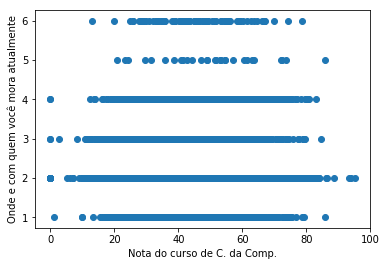

In [13]:
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.QE_I06)
plt.ylabel('Onde e com quem você mora atualmente')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()

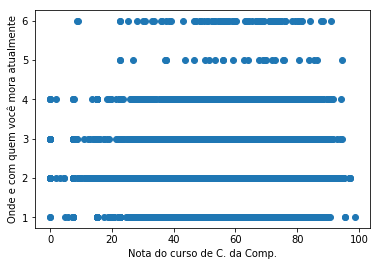

In [14]:
plt.scatter( ccomp.NT_FG, ccomp.QE_I06)
plt.ylabel('Onde e com quem você mora atualmente')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()

In [15]:
#Estudantes que moram com os pais
compais = ccomp.loc[ccomp.QE_I06 == 2]
compais.NT_GER.describe()

count    5762.000000
mean       43.470462
std        13.539830
min         0.000000
25%        34.100000
50%        42.500000
75%        52.500000
max        95.100000
Name: NT_GER, dtype: float64

In [16]:
#Estudantes que moram sem os pais
sempais = ccomp.loc[ccomp.QE_I06 != 2]
sempais.NT_GER.describe()

count    2646.000000
mean       43.007029
std        13.810349
min         0.000000
25%        33.200000
50%        41.900000
75%        52.500000
max        85.900000
Name: NT_GER, dtype: float64

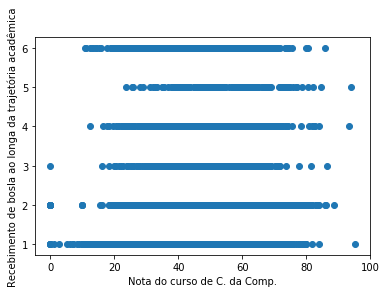

In [17]:
#visualmente
plt.scatter( ccomp.NT_GER, ccomp.QE_I13)
plt.ylabel('Recebimento de bosla ao longa da trajetória acadêmica')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()

In [18]:
#Estudantes que receberam bolsa
combolsa = ccomp.loc[ccomp.QE_I13 != 1]
combolsa.NT_GER.describe()

count    3015.000000
mean       49.126567
std        13.951450
min         0.000000
25%        39.400000
50%        49.300000
75%        58.700000
max        93.900000
Name: NT_GER, dtype: float64

In [19]:
#Estudantes que não receberam bolsa
sembolsa = ccomp.loc[ccomp.QE_I13 == 1]
sembolsa.NT_GER.describe()

count    5393.000000
mean       40.080994
std        12.302738
min         0.000000
25%        31.700000
50%        39.300000
75%        47.900000
max        95.100000
Name: NT_GER, dtype: float64

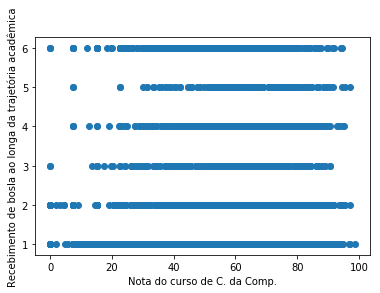

In [20]:
#visualmente
plt.scatter(ccomp.NT_FG, ccomp.QE_I13)
plt.ylabel('Recebimento de bosla ao longa da trajetória acadêmica')
plt.xlabel('Nota do curso de C. da Comp.')
plt.show()

In [21]:
#Estudantes que receberam bolsa
combolsa = ccomp.loc[ccomp.QE_I13 != 1]
combolsa.NT_FG.describe()

count    3015.000000
mean       57.788358
std        18.089648
min         0.000000
25%        46.300000
50%        59.700000
75%        71.200000
max        97.000000
Name: NT_FG, dtype: float64

In [22]:
#Estudantes que não receberam bolsa
sembolsa = ccomp.loc[ccomp.QE_I13 == 1]
sembolsa.NT_FG.describe()

count    5393.000000
mean       52.214500
std        17.479088
min         0.000000
25%        40.300000
50%        53.200000
75%        65.100000
max        98.600000
Name: NT_FG, dtype: float64

### Verificação de resultados

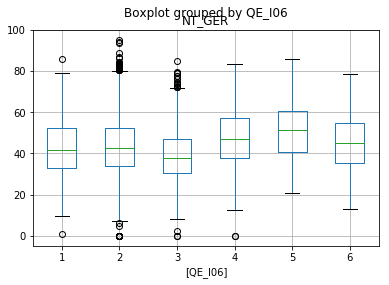

In [232]:
qe06 = pandas.DataFrame(ccomp, columns=['NT_GER', 'QE_I06'])
qe06.boxplot(by='QE_I06')

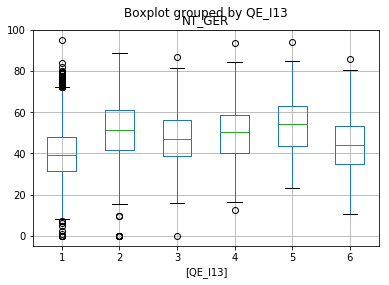

In [233]:
qe13 = pandas.DataFrame(ccomp, columns=['NT_GER', 'QE_I13'])
qe13.boxplot(by='QE_I13')


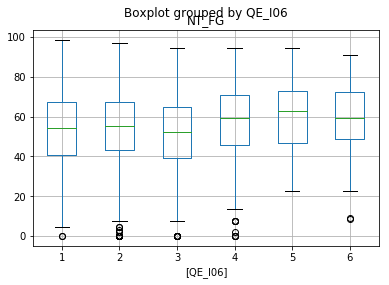

In [23]:
qe06 = pandas.DataFrame(ccomp, columns=['NT_FG', 'QE_I06'])
qe06.boxplot(by='QE_I06')

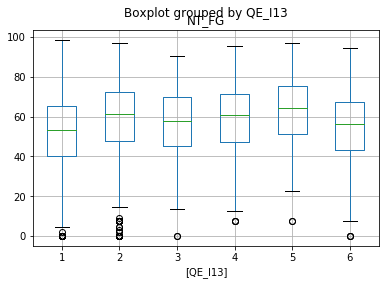

In [24]:
qe13 = pandas.DataFrame(ccomp, columns=['NT_FG', 'QE_I13'])
qe13.boxplot(by='QE_I13')

In [234]:
#A análise de variância (ANOVA) é um teste usado para comparar as médias de dois grupos. 
#suposições: normalidade, independência e variância homegênea

#nota geral agrupada pela questão 06
ccomp['NT_GER'].groupby(ccomp['QE_I06']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I06,,,,,,,,
1,729.0,42.884774,13.567003,1.2,32.9,41.7,52.300,85.7
2,5762.0,43.470462,13.539830,0.0,34.1,42.5,52.500,95.1
3,1020.0,39.292647,12.986906,0.0,30.4,38.0,47.025,84.6
4,787.0,47.427700,13.638345,0.0,37.9,47.0,57.300,83.1
5,29.0,49.872414,15.941767,20.7,40.7,51.4,60.600,85.9
6,81.0,45.471605,13.214313,12.9,35.4,45.1,54.700,78.7


In [235]:
#nota geral agrupada pela questão 13
ccomp['NT_GER'].groupby(ccomp['QE_I13']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I13,,,,,,,,
1,5393.0,40.080994,12.302738,0.0,31.700,39.3,47.900,95.1
2,1400.0,51.183071,14.203853,0.0,41.575,51.6,61.125,88.6
3,379.0,47.116095,12.295492,0.0,38.650,46.8,56.100,86.5
4,455.0,49.510549,13.391774,12.5,40.300,50.2,58.550,93.3
5,163.0,54.262577,13.278011,23.5,43.550,54.3,62.900,93.9
6,618.0,44.063430,13.328950,10.7,34.825,44.0,53.475,85.7


In [25]:
#nota geral agrupada pela questão 06
ccomp['NT_FG'].groupby(ccomp['QE_I06']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I06,,,,,,,,
1,729.0,53.201920,18.248302,0.0,40.60,54.4,67.300,98.6
2,5762.0,54.253853,17.679783,0.0,43.20,55.5,67.200,97.0
3,1020.0,51.930490,18.434157,0.0,39.15,52.5,65.025,94.4
4,787.0,57.192249,17.894251,0.0,45.65,59.1,70.700,94.2
5,29.0,59.617241,19.636356,22.5,46.60,62.7,72.700,94.4
6,81.0,58.290123,18.219979,8.8,48.60,59.5,72.200,91.0


In [26]:
#nota geral agrupada pela questão 13
ccomp['NT_FG'].groupby(ccomp['QE_I13']).describe()

,count,mean,std,min,25%,50%,75%,max
QE_I13,,,,,,,,
1,5393.0,52.214500,17.479088,0.0,40.30,53.20,65.100,98.6
2,1400.0,58.731286,18.547338,0.0,47.80,61.20,72.325,97.0
3,379.0,56.754617,17.005023,0.0,45.00,57.60,69.600,90.6
4,455.0,59.015385,17.589382,7.5,47.15,60.70,71.550,95.2
5,163.0,62.220859,17.163766,7.5,51.25,64.20,75.400,97.0
6,618.0,54.213754,17.736584,0.0,43.00,56.05,67.500,94.6


(0.9918650984764099, 0.0004941278602927923)
(0.9928305149078369, 0.9372762441635132)


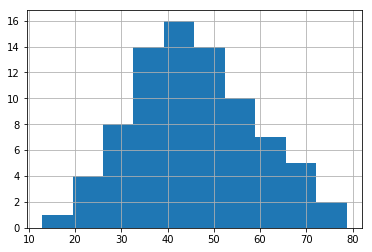

In [238]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qe06.NT_GER.loc[qe06.QE_I06 ==1]))

print(stats.shapiro(qe06.NT_GER.loc[qe06.QE_I06 ==6]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe06.NT_GER.loc[qe06.QE_I06 ==6].hist()

(0.9952930808067322, 3.155765579410108e-12)
(0.9957941174507141, 0.09572052955627441)


C:\Users\David\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


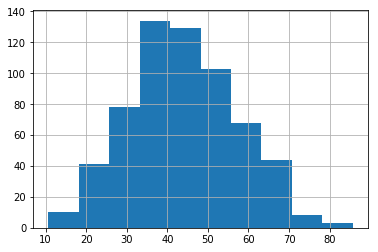

In [243]:
print(stats.shapiro(qe13.NT_GER.loc[qe13.QE_I13 == 1]))

print(stats.shapiro(qe13.NT_GER.loc[qe13.QE_I13 == 6]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe13.NT_GER.loc[qe13.QE_I13 == 6].hist()

(0.989573061466217, 4.799445378012024e-05)
(0.9641056656837463, 0.022779883816838264)


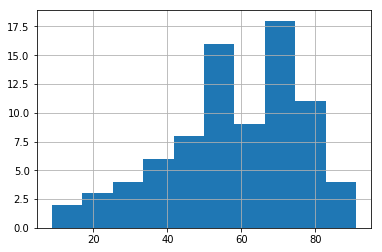

In [28]:
#teste das suposições
import scipy.stats as stats

print(stats.shapiro(qe06.NT_FG.loc[qe06.QE_I06 ==1]))

print(stats.shapiro(qe06.NT_FG.loc[qe06.QE_I06 ==6]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe06.NT_FG.loc[qe06.QE_I06 ==6].hist()

(0.9913341403007507, 1.1487736281806801e-17)
(0.9837441444396973, 2.2487151909444947e-06)


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


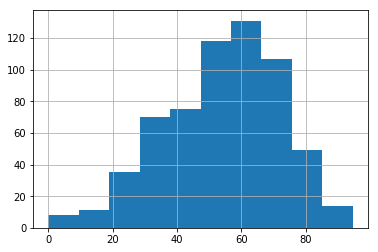

In [29]:
print(stats.shapiro(qe13.NT_FG.loc[qe13.QE_I13 == 1]))

print(stats.shapiro(qe13.NT_FG.loc[qe13.QE_I13 == 6]))

#a saída do teste é o valor W e o p-value
#Considera-se que a suposição não é violada quando o p-value é maior que alpha, normalmente 0.05

#pelo histograma, também é possível observar a distribuição dos dados. 
qe13.NT_FG.loc[qe13.QE_I13 == 6].hist()

In [240]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qe06.NT_GER.loc[qe06.QE_I06 ==1], qe06.NT_GER.loc[qe06.QE_I06 ==6])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qe06.NT_GER.loc[qe06.QE_I06 ==1], qe06.NT_GER.loc[qe06.QE_I06 ==6])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qe06.NT_GER.loc[qe06.QE_I06 ==1], qe06.NT_GER.loc[qe06.QE_I06 ==6])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=26203.000, p=0.048
Distribução diferente
Kruskal-Wallis: Estatisticas=2.765, p=0.096
Mesma distribuição
Anova: Estatisticas=2.664, p=0.103
Mesma distribuição


In [30]:
# teste não paramétrico são métodos que não assumem uma distribuição específica para os dados.
stat, p = stats.mannwhitneyu(qe06.NT_FG.loc[qe06.QE_I06 ==1], qe06.NT_FG.loc[qe06.QE_I06 ==6])

print('Mann-Whitney: Estatisticas=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
    
stat, p = stats.kruskal(qe06.NT_FG.loc[qe06.QE_I06 ==1], qe06.NT_FG.loc[qe06.QE_I06 ==6])
print('Kruskal-Wallis: Estatisticas=%.3f, p=%.3f' % (stat, p))

if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')
    
#anova
stat, p = stats.f_oneway(qe06.NT_FG.loc[qe06.QE_I06 ==1], qe06.NT_FG.loc[qe06.QE_I06 ==6])
print('Anova: Estatisticas=%.3f, p=%.3f' % (stat, p))
if p > alpha:
	print('Mesma distribuição')
else:
	print('Distribução diferente')

Mann-Whitney: Estatisticas=24321.000, p=0.005
Distribução diferente
Kruskal-Wallis: Estatisticas=6.785, p=0.009
Distribução diferente
Anova: Estatisticas=5.670, p=0.017
Distribução diferente
